# Reporte de Resultados

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import arff
import json
pd.set_option('display.max_rows', None)  # This line allows all rows to be displayed
pd.set_option('display.max_columns', None)  # This line allows all columns to be displayed


### Metodología:

En esta documento comparamos 4 experimentos realizados sobre el dataset de 'leukemia':
- '0001' utilizando dataset original y 
- '0002' realizado con dataset aumentado en 100 observaciones mediante un VAE 
- '0003' realizado con dataset aumentado en 1000 observaciones mediante un VAE 
- '0006' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.01 y alpha 0.3 (multiobjectivo 0.7*genes/0.3*clasificación), 10 pruebas.
- '0007' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.01 y alpha 0.5 (multiobjectivo 0.5*genes/0.5*clasificación), 10 pruebas.
- '0008' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.01 y alpha 0.2 (multiobjectivo 0.8*genes/0.2*clasificación), 30 pruebas.
- '0009' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.01 y alpha 0.5 (multiobjectivo 0.5*genes/0.5*clasificación), 30 pruebas.

Se corrieron 30 pruebas bajo la misma configuración en cada uno de los dos experimentos. 
Se trabajo con un algoritmo genético con la configuración aprobada por equipo de directores.

### Resultados

- los resultados son estables a lo largo de las pruebas en cada experimento, el 'acc' obtenido es 100%, 
- los resultados son consistentes entre los dos grupos de experimentos como podrá verse en el resumen estadístico y gráficos. 

In [2]:
data = pd.read_csv('experiments_results.csv')

In [3]:
data.head(3)

,experiment_name,date,description,current_dir,POP_SIZE,PROB_MUT,PX,GMAX,DAT_SIZE,all_features_fitness,all_feature_ngenes,all_feature_acc,elite_fitness,elite_ngenes,elite_acc,pob_fitness_avg,pob_accuracy_avg,pob_ngenes_avg,pob_fitness_std,pob_accuracy_std,pob_ngenes_std,pob_fitness_max,pob_accuracy_max,pob_ngenes_max
0,leukemia_base_0001_0,2024-03-23,multiexperiments,/root/ealab/expga1,100,1,0.75,20,38,0.456,7129,0.912,0.952,680,1.0,0.952,1.0,680.0,0.0,0.0,0.0,0.952,1.0,680
1,leukemia_base_0001_1,2024-03-23,multiexperiments,/root/ealab/expga1,100,1,0.75,20,38,0.456,7129,0.912,0.951,700,1.0,0.951,1.0,700.0,0.0,0.0,0.0,0.951,1.0,700
2,leukemia_base_0001_2,2024-03-23,multiexperiments,/root/ealab/expga1,100,1,0.75,20,38,0.456,7129,0.912,0.953,674,1.0,0.953,1.0,674.0,0.0,0.0,0.0,0.953,1.0,674


In [4]:
data.columns

Index(['experiment_name', 'date', 'description', 'current_dir', 'POP_SIZE',
       'PROB_MUT', 'PX', 'GMAX', 'DAT_SIZE', 'all_features_fitness',
       'all_feature_ngenes', 'all_feature_acc', 'elite_fitness',
       'elite_ngenes', 'elite_acc', 'pob_fitness_avg', 'pob_accuracy_avg',
       'pob_ngenes_avg', 'pob_fitness_std', 'pob_accuracy_std',
       'pob_ngenes_std', 'pob_fitness_max', 'pob_accuracy_max',
       'pob_ngenes_max'],
      dtype='object')

## Resumen Estadístico

In [ ]:
leukemias = data[data['experiment_name'].str.contains('leukemia')]
# extract the firts 18 letters of the experiment name
leukemias['experiment_group'] = leukemias['experiment_name'].apply(lambda x: x[:18])

In [6]:
# count the unique value on the column 'experiment_name'
leukemias['experiment_group'].value_counts()

experiment_group
leukemia_base_0001    30
leukemia_base_0002    30
leukemia_base_0008    30
leukemia_base_0009    30
leukemia_base_0006    10
leukemia_base_0007    10
leukemia_base_0003     3
Name: count, dtype: int64

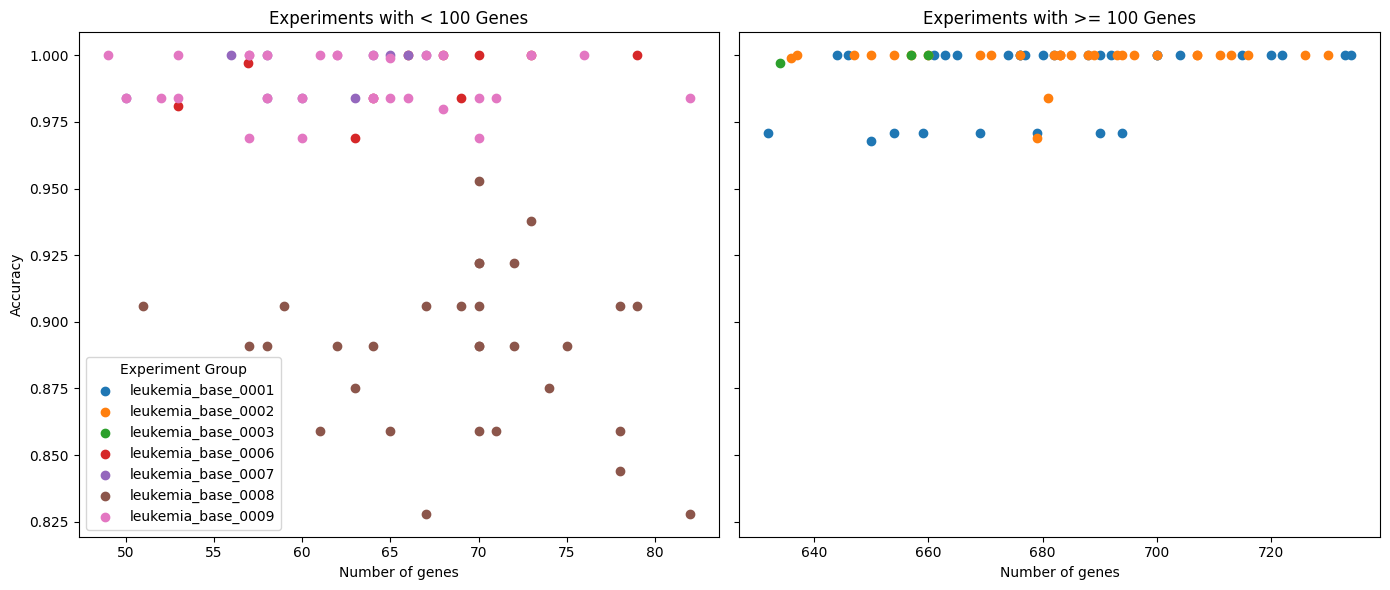

In [53]:
import matplotlib.pyplot as plt

# Factorize the 'experiment_group' to get labels and unique ids
groups, labels = pd.factorize(leukemias['experiment_group'])

# Set up the matplotlib figure and axes for two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Define the condition for splitting the data
condition = leukemias['pob_ngenes_avg'] < 100

# Plot for 'pob_ngenes_avg' below 100
for i, label in enumerate(labels):
    group_data = leukemias[(groups == i) & condition]
    axes[0].scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)
axes[0].set_title('Experiments with < 100 Genes')
axes[0].set_xlabel('Number of genes')
axes[0].set_ylabel('Accuracy')

# Plot for 'pob_ngenes_avg' above 100
for i, label in enumerate(labels):
    group_data = leukemias[(groups == i) & ~condition]
    axes[1].scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)
axes[1].set_title('Experiments with >= 100 Genes')
axes[1].set_xlabel('Number of genes')
#axes[1].set_ylabel('Accuracy')  # No need to set again, shared y-axis

# Add a legend to the first subplot (or to both if necessary)
axes[0].legend(title="Experiment Group")
# axes[1].legend(title="Experiment Group")  # Optional: add if needed for clarity

# Show plot
plt.tight_layout()  # Adjust layout to not overlap
plt.show()



## Exploración de la selección de características

In [8]:
# Replace 'your_file.json' with the path to your JSON file
with open('experiments.json', 'r') as file:
    features = json.load(file)


In [9]:
for key, value in list(features.items())[:2]:
    print(f'Experiment: {key}')
    common_genome_all_prob = value['common_genome_all_prob']
    common_genome_bin = value['common_genome_bin']
    common_genome_bin_sum = value['common_genome_bin_sum']
    common_genome_prob_sum = value['common_genome_prob_sum']
    selected_features_bin = value['selected_features_bin']
    selected_features_prob = value['selected_features_prob']
    print(f'    common genome: {common_genome_all_prob[:20]}')
    print(f'    common genome len: {len(common_genome_all_prob)}')
    print(f'    common genome bin: {common_genome_bin[:20]}')
    print(f'    common genome bin len: {len(common_genome_bin)}')        
    print(f'    common genome bin sum: {common_genome_bin_sum}')
    print(f'    common genome prob sum: {common_genome_prob_sum}')
    print(f'    selected features bin: {selected_features_bin[:3]}')    
    print(f'    selected features prob: {selected_features_prob[:3]}')
    

Experiment: leukemia_base_0001_0
    common genome: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    common genome len: 7129
    common genome bin: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    common genome bin len: 7129
    common genome bin sum: 680
    common genome prob sum: 680
    selected features bin: ['AFFX-BioB-3_at', 'AFFX-ThrX-5_at', 'AFFX-ThrX-3_at']
    selected features prob: ['AFFX-BioB-3_at', 'AFFX-ThrX-5_at', 'AFFX-ThrX-3_at']
Experiment: leukemia_base_0001_1
    common genome: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    common genome len: 7129
    common genome bin: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    common genome bin len: 7129
    common genome bin sum: 700
    common genome prob sum: 700
    selected features bin: ['AFFX-TrpnX-5_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMGAPDH/M33197_5_at']
    sele

# Feature Frequency by Experiments

In [10]:
result_acc_features = []

for key, value in features.items():    
    result = {}
    selected_features_bin = value['selected_features_bin']
    experiment_name = key
    result = {'experiment_name': experiment_name, 'selected_features_bin': selected_features_bin}    
    result_acc_features.append(result)

    

In [11]:
# Create a DataFrame from the list of dictionaries and add form 'data' the columns 'pob_accuracy_avg' and 'pob_ngenes_avg' using the 'experiment_name' as key
result_acc_features = pd.DataFrame(result_acc_features)
result_acc_features = result_acc_features.merge(data[['experiment_name', 'pob_accuracy_avg', 'pob_ngenes_avg']], on='experiment_name')


In [12]:
result_acc_features.head(3)


,experiment_name,selected_features_bin,pob_accuracy_avg,pob_ngenes_avg
0,leukemia_base_0001_0,"[AFFX-BioB-3_at, AFFX-ThrX-5_at, AFFX-ThrX-3_a...",1.0,680.0
1,leukemia_base_0001_1,"[AFFX-TrpnX-5_at, AFFX-HUMISGF3A/M97935_MB_at,...",1.0,700.0
2,leukemia_base_0001_2,"[AFFX-BioC-3_at, AFFX-CreX-3_st, AFFX-PheX-5_a...",1.0,674.0


In [13]:
# expand the 'selected_features_bin' column into multiple rows
result_acc_features_long = result_acc_features.explode('selected_features_bin')

In [14]:
result_acc_features_long.head(3)

,experiment_name,selected_features_bin,pob_accuracy_avg,pob_ngenes_avg
0,leukemia_base_0001_0,AFFX-BioB-3_at,1.0,680.0
0,leukemia_base_0001_0,AFFX-ThrX-5_at,1.0,680.0
0,leukemia_base_0001_0,AFFX-ThrX-3_at,1.0,680.0


In [20]:
# group by the 'selected_features_bin', count the number of occurrence and concatenate the 'experiment_name' and 'pob_accuracy_avg' columns
result_acc_features_wide = result_acc_features_long.groupby('selected_features_bin').agg(
    experiment_name=('experiment_name', lambda x: ', '.join(x)),
    # create a list with the 'pob_accuracy_avg' values
    pob_accuracy_avg=('pob_accuracy_avg', list),
    # crate a list with the 'pob_ngenes_avg' values
    pob_ngenes_avg=('pob_ngenes_avg', list),
    count=('experiment_name', 'count')
).reset_index()

In [21]:
result_acc_features_wide.sort_values('count', ascending=False).head(3)

,selected_features_bin,experiment_name,pob_accuracy_avg,pob_ngenes_avg,count
9921,X90568_at,"leukemia_base_0001_13, leukemia_base_0001_22, ...","[1.0, 0.971, 1.0, 0.971, 1.0, 1.0, 1.0, 1.0, 1...","[682.0, 690.0, 676.0, 669.0, 665.0, 683.0, 660...",20
5880,M20203_s_at,"leukemia_base_0001_0, leukemia_base_0001_1, le...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[680.0, 700.0, 700.0, 644.0, 660.0, 682.0, 657...",19
9268,X55668_at,"leukemia_base_0001_2, leukemia_base_0001_3, le...","[1.0, 1.0, 1.0, 0.971, 1.0, 1.0, 1.0, 1.0, 1.0...","[674.0, 733.0, 677.0, 694.0, 676.0, 646.0, 663...",19


In [63]:
# print the columns data types
result_acc_features_wide.shape


(10755, 5)

In [75]:
# save the result to a csv file
result_acc_features_wide.to_csv('features_occurrence.csv', index=False)

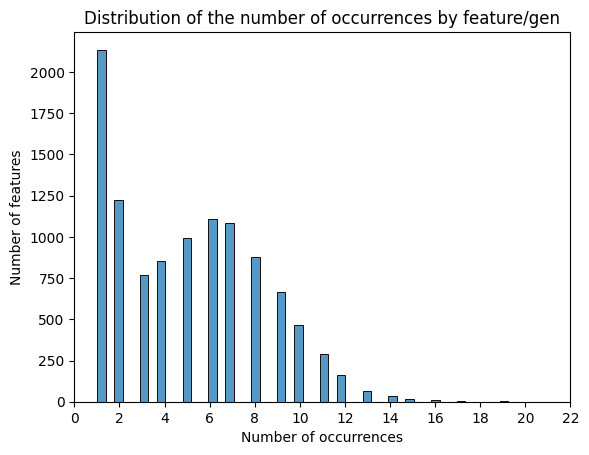

In [73]:
# plot the distribution of the count column
sns.histplot(result_acc_features_wide['count'], bins=50)
# make the x-axis integer values
plt.xticks(np.arange(0, 23, 2))
# set the x-axis label
plt.xlabel('Number of occurrences')
# set the y-axis label
plt.ylabel('Number of features')
# show the plot
# title of the plot
plt.title('Distribution of the number of occurrences by feature/gen')
plt.show()



# Arrange features by experiment accuarcy in population

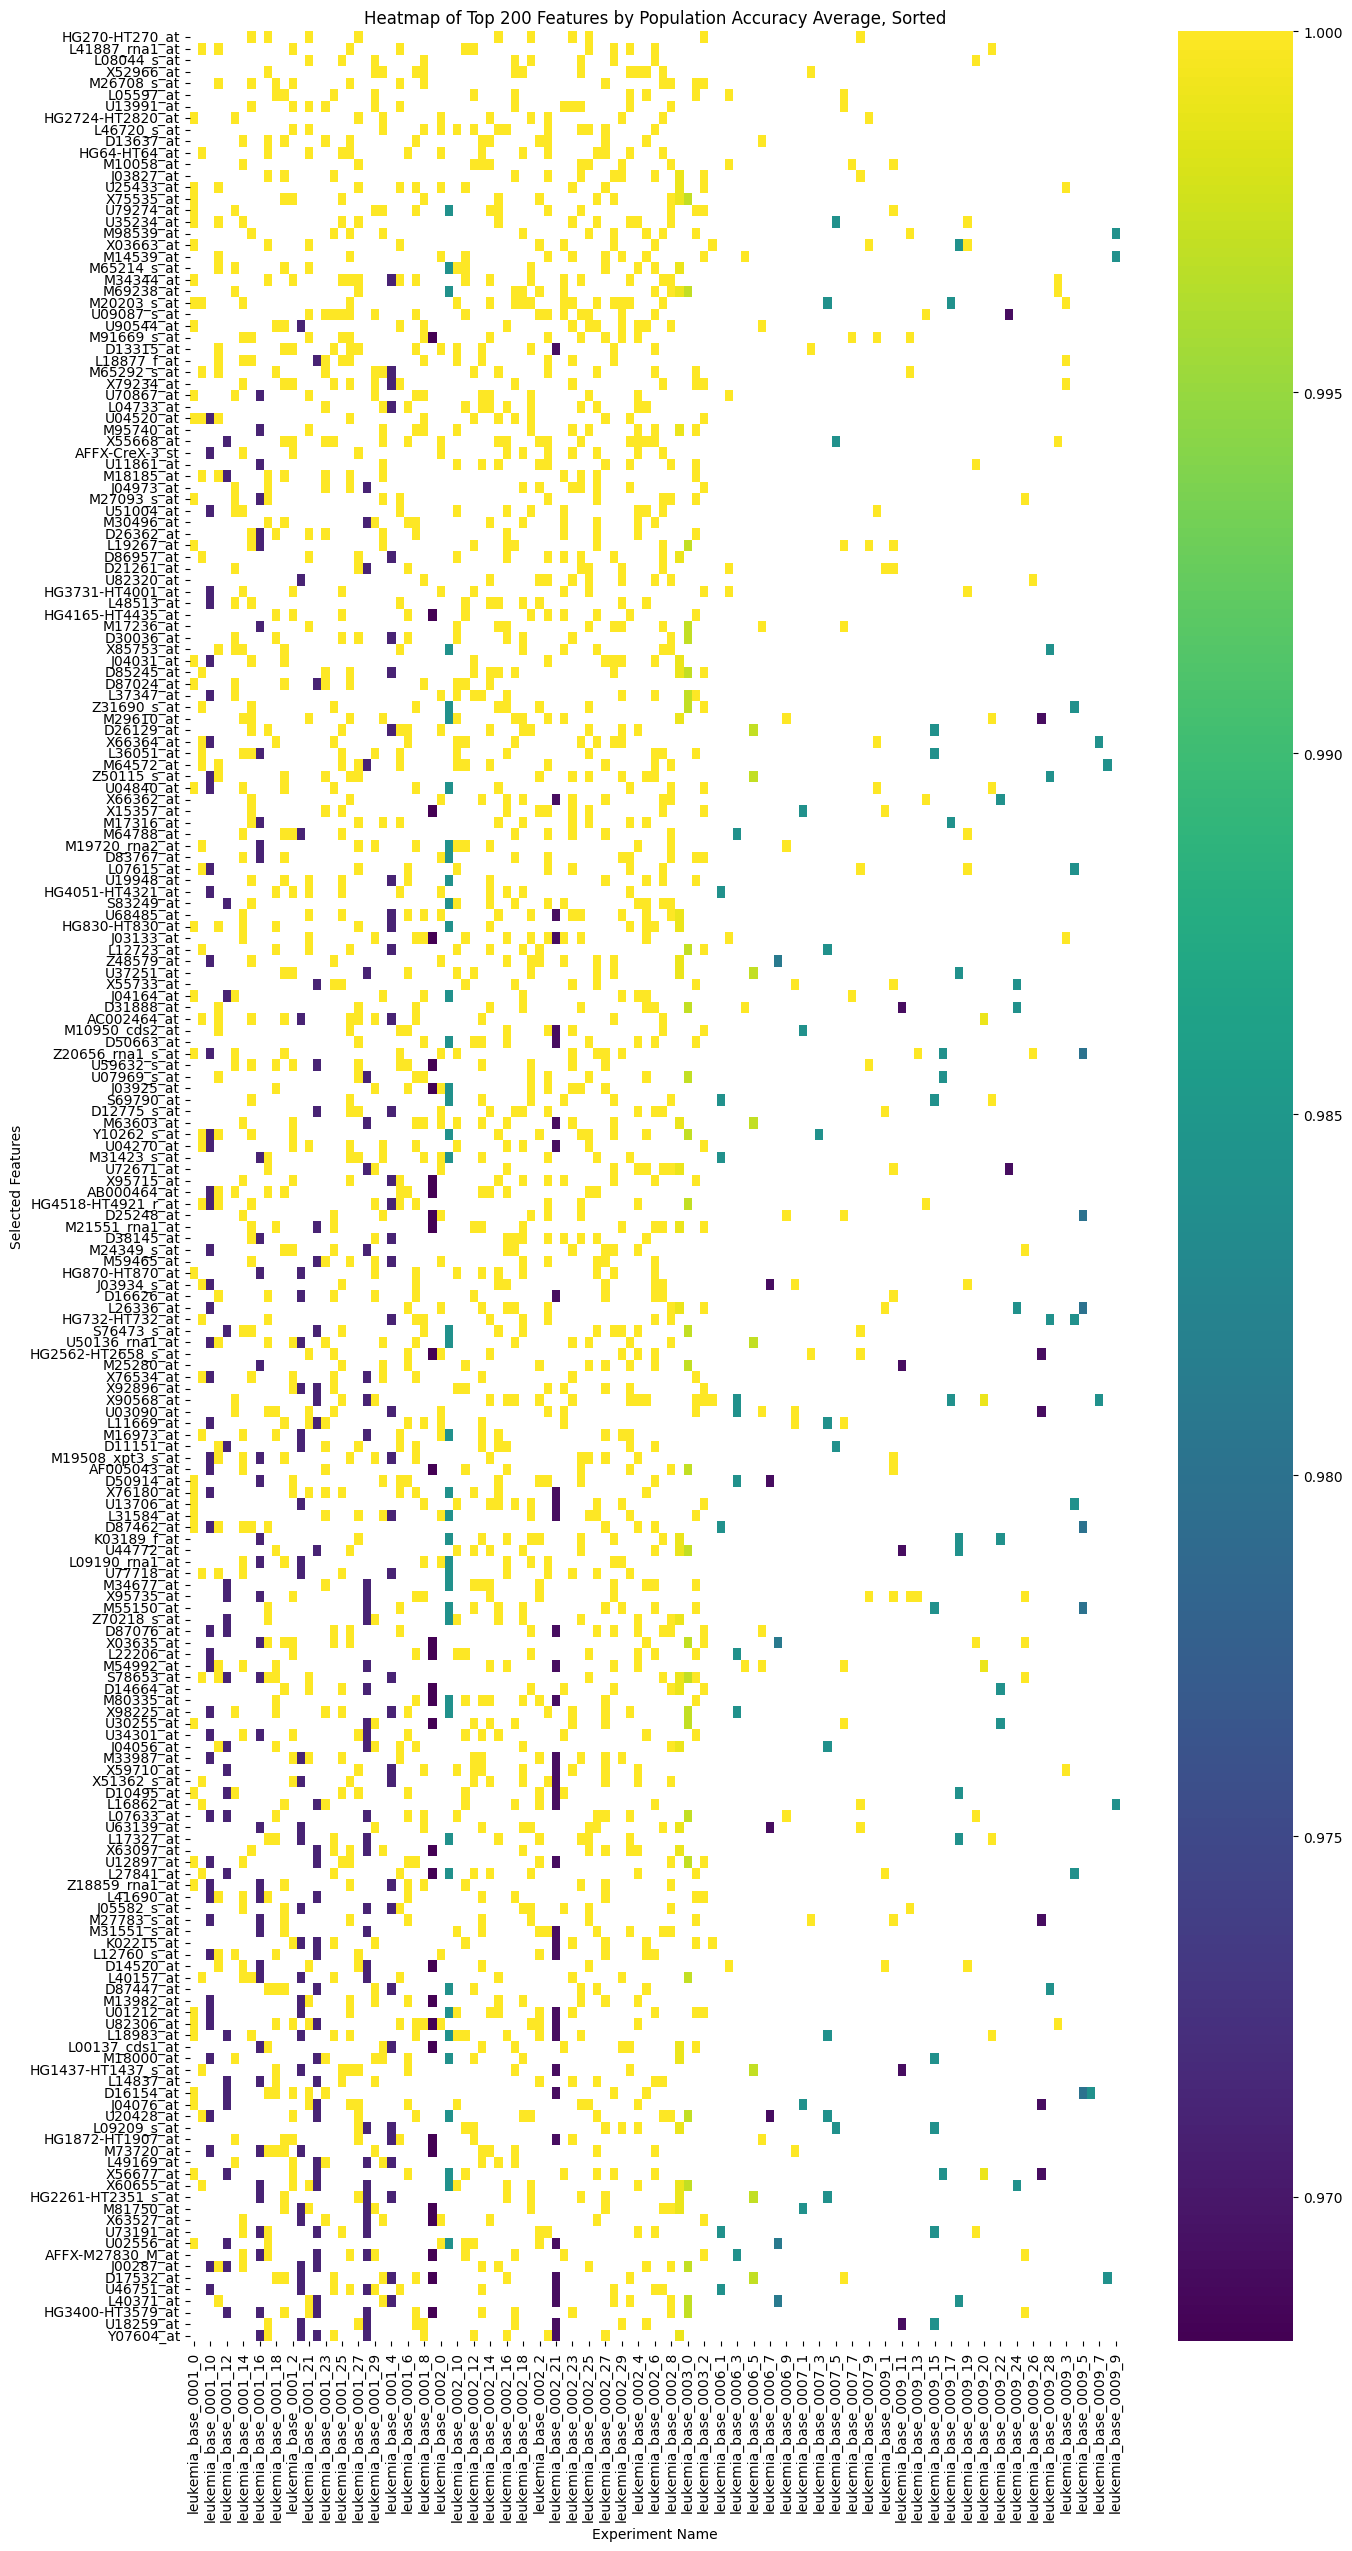

In [62]:
# Assuming the DataFrame is already loaded as df
df = result_acc_features_wide

# Filter the top 50 features by 'count'
top_features = df.nlargest(200, 'count')

# Expand the 'pob_accuracy_avg' and 'experiment_name' into individual rows
expanded_rows = []
for index, row in top_features.iterrows():
    accuracies = row['pob_accuracy_avg']
    experiment_names = row['experiment_name'].split(', ')
    
    if isinstance(accuracies, str):
        accuracies = eval(accuracies)

    for accuracy, exp_name in zip(accuracies, experiment_names):
        if 'leukemia_base_0008' not in exp_name.strip():
            expanded_rows.append({
                'selected_features_bin': row['selected_features_bin'],
                'pob_accuracy_avg': accuracy,
                'experiment_name': exp_name.strip()
            })

expanded_df = pd.DataFrame(expanded_rows)

# Create a pivot table for the heatmap
pivot_table = expanded_df.pivot_table(index='selected_features_bin', columns='experiment_name', values='pob_accuracy_avg', aggfunc='mean')

average_accuracy = pivot_table.mean(axis=1).sort_values(ascending=False)
sorted_pivot_table = pivot_table.loc[average_accuracy.index]

# Plot heatmap without annotations and sorted by average accuracy
plt.figure(figsize=(15, 30))  # Adjust the size accordingly
sns.heatmap(sorted_pivot_table, annot=False, cmap='viridis')
plt.title('Heatmap of Top 200 Features by Population Accuracy Average, Sorted')
plt.xlabel('Experiment Name')
# adjust the y-axis to include all the features
plt.yticks(np.arange(0.5, len(sorted_pivot_table), 1), sorted_pivot_table.index)
plt.ylabel('Selected Features')
plt.show()